**IIT ROORKEE ASSIGNMENT 1**

--Assignment: Advanced Market Analysis of the Games Industry--
--Objective: T o conduct a detailed market analysis of the games industry using data manipulation and analysis techniques in Python.--
--The study aims to uncover key trends, predict future performance, and provide actionable insights for stakeholders--

Scenario:
You are a data analyst at a leading market research firm. Your task is to analyze the games
industry dataset to extract valuable insights. Begin by preparing and exploring the data.

Tasks:
1. Data Cleaning and Preprocessing:
● Identify and handle missing or anomalous values in the dataset.
● Standardize the 'Genre' and 'Platform' columns for consistency.
● Create new features such as 'Decade' from the 'Release Year' column.

--First Will Import CSV Data File--


In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
file_path = 'games_dataset.csv'
data = pd.read_csv(file_path)
print(data.head())

                      Game Name       Genre         Platform  Release Year  \
0     Sekiro: Shadows Die Twice      Sports  Nintendo Switch          2014   
1                       Control      Puzzle  Nintendo Switch          2000   
2                      Among Us    Strategy  Nintendo Switch          2007   
3  Call of Duty: Modern Warfare     Stealth      PlayStation          2005   
4             League of Legends  Simulation               PC          2021   

   User Rating  
0     9.654719  
1     3.457386  
2     5.367622  
3     1.240325  
4     3.535476  


**1. Identify and Handle Missing or Anomalous Values**

In [18]:
print(data.isnull().sum())
data = data.fillna({'Genre': 'Unknown', 'Platform': 'Unknown'})
data = data.dropna()
print(data.describe())
data = data[(data['User Rating'] >= 0) & (data['User Rating'] <= 10)]
print(data.head())
data.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved successfully!")

Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64
       Release Year  User Rating
count   5000.000000  5000.000000
mean    2011.375400     5.524913
std        6.943984     2.598429
min     2000.000000     1.005878
25%     2005.000000     3.260596
50%     2011.000000     5.574233
75%     2017.000000     7.802727
max     2023.000000     9.996196
                      Game Name       Genre         Platform  Release Year  \
0     Sekiro: Shadows Die Twice      Sports  Nintendo Switch          2014   
1                       Control      Puzzle  Nintendo Switch          2000   
2                      Among Us    Strategy  Nintendo Switch          2007   
3  Call of Duty: Modern Warfare     Stealth      PlayStation          2005   
4             League of Legends  Simulation               PC          2021   

   User Rating  
0     9.654719  
1     3.457386  
2     5.367622  
3     1.240325  
4     3.535476  
Cleaned dataset saved success

**2 Standardize the 'Genre' and 'Platform' columns for consistency**


In [26]:
data['Genre'] =data['Genre'].str.strip().str.lower()
data['Platform'] =data['Platform'].str.strip().str.lower()
Genre_mapping = {'fps': 'shooter', 'rpgs': 'role-playing', 'stealth': 'strategy'}
platform_mapping = {'ps': 'PlayStation', 'nintendo switch': 'Nintendo Switch', 'pc': 'PC'}

data['Genre'] = data['Genre'].replace(Genre_mapping)
data['Platform'] = data['Platform'].replace(platform_mapping)
print(data['Genre'].unique())
print(data['Platform'].unique())

['sports' 'puzzle' 'strategy' 'simulation' 'shooter' 'adventure' 'horror'
 'racing' 'role-playing' 'action' 'survival' 'fighting' 'platformer']
['Nintendo Switch' 'playstation' 'PC' 'xbox' 'mobile']


**Create New Features**

In [30]:
data['Decade'] =(data['Release Year'] // 10)*10
print(data[['Release Year','Decade']].head())

   Release Year  Decade
0          2014    2010
1          2000    2000
2          2007    2000
3          2005    2000
4          2021    2020


**2. Exploratory Data Analysis (EDA):**
**● Analyze trends in game sales based on genre, platform, and release year.**
**● Visualize the distribution of user ratings across different genres and platforms.**
**● Identify the top 5 genres and platforms by average user rating.**

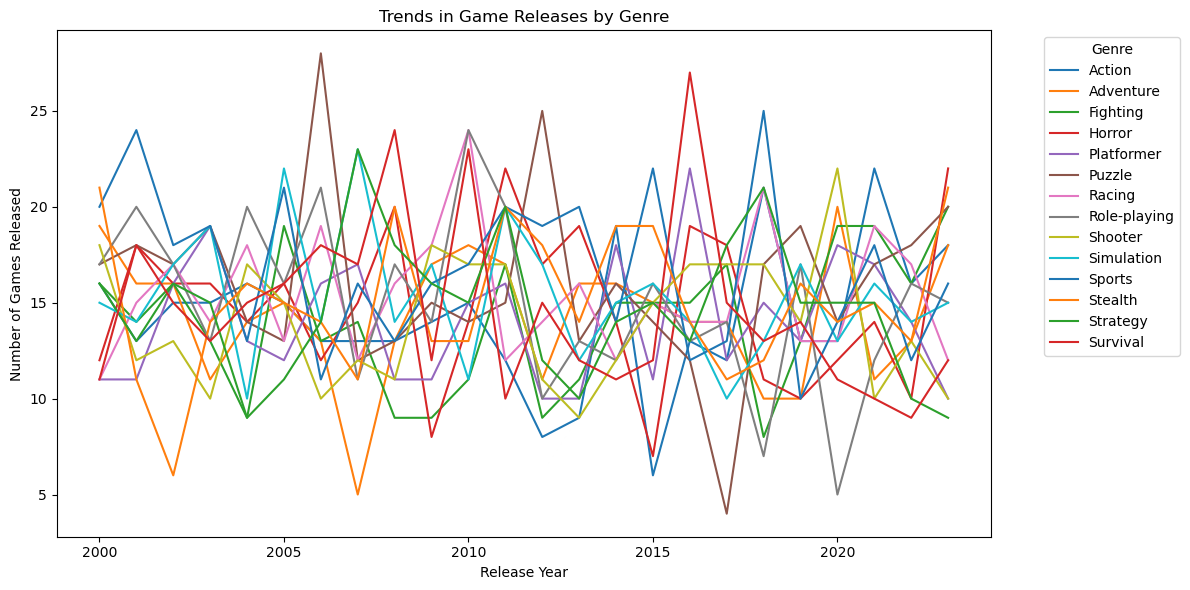

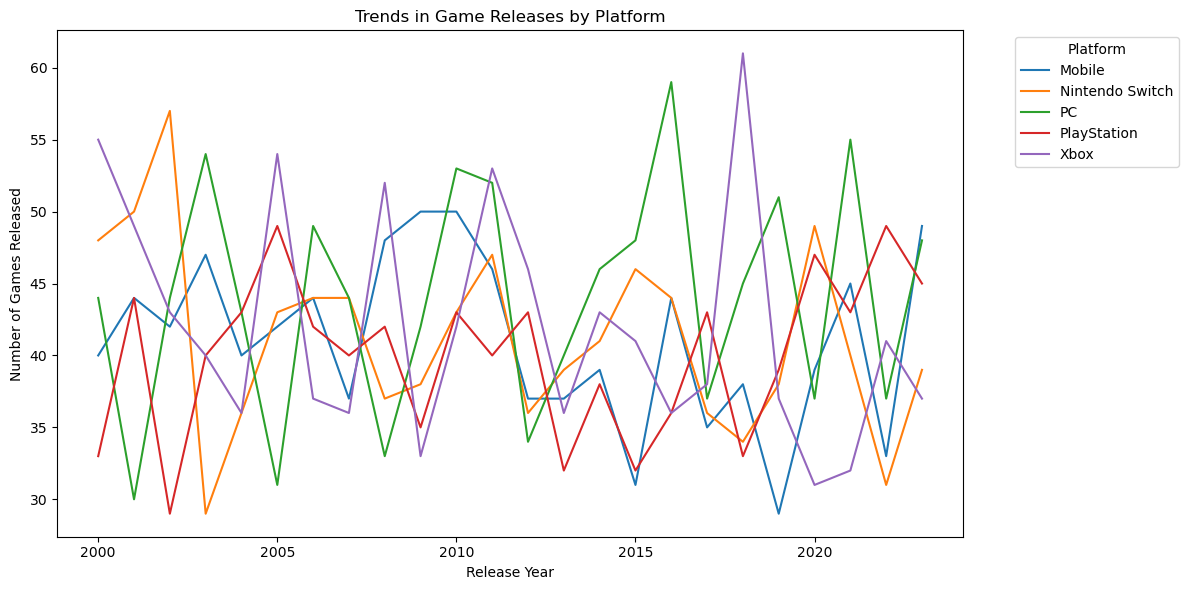

Top 5 Genres By User rating: 
Genre
Survival      5.831934
Horror        5.629845
Simulation    5.626343
Action        5.603556
Sports        5.561171
Name: User Rating, dtype: float64
Top 5 Platform By User rating: 
Platform
PC                 5.599444
Xbox               5.531032
PlayStation        5.523658
Nintendo Switch    5.523076
Mobile             5.441895
Name: User Rating, dtype: float64


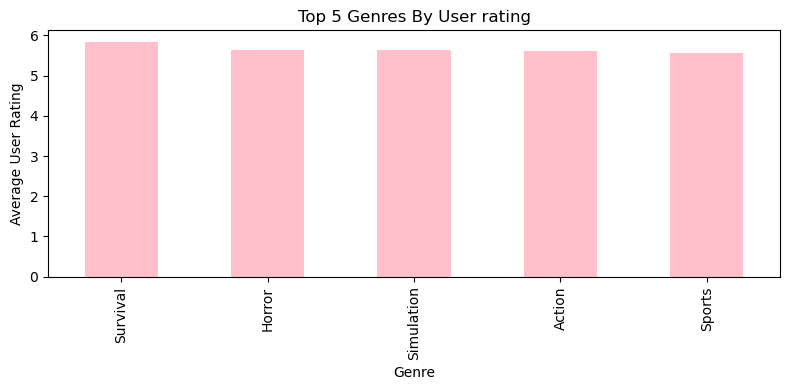

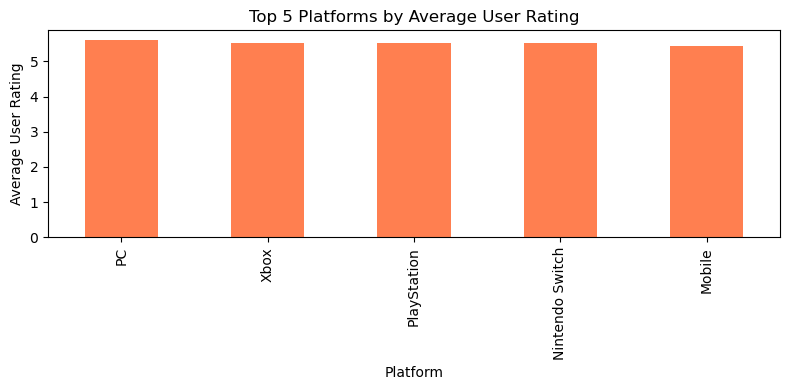

In [54]:
# Count the number of games released per year by Genre
game_trends_by_genre = data.groupby(['Release Year', 'Genre']).size().reset_index(name='Game Count')

# Pivot for visualization
game_pivot_by_genre = game_trends_by_genre.pivot(index='Release Year', columns='Genre', values='Game Count')

# Plot trends in game releases by genre
plt.figure(figsize=(12, 6))
game_pivot_by_genre.plot(ax=plt.gca())
plt.title("Trends in Game Releases by Genre")
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Count the number of games released per year by Platform
game_trends_by_platform = data.groupby(['Release Year', 'Platform']).size().reset_index(name='Game Count')

# Pivot for visualization
game_pivot_by_platform = game_trends_by_platform.pivot(index='Release Year', columns='Platform', values='Game Count')

# Plot trends in game releases by platform
plt.figure(figsize=(12, 6))
game_pivot_by_platform.plot(ax=plt.gca())
plt.title("Trends in Game Releases by Platform")
plt.xlabel("Release Year")
plt.ylabel("Number of Games Released")
plt.legend(title="Platform", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Top_Genres = data.groupby('Genre')['User Rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Genres By User rating: ")
print(Top_Genres)

Top_Platform = data.groupby('Platform')['User Rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 Platform By User rating: ")
print(Top_Platform)

plt.figure(figsize=(8,4))
Top_Genres.plot(kind ='bar', color ='Pink',title ='Top 5 Genres By User rating')
plt.ylabel("Average User Rating")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
Top_Platform.plot(kind='bar', color='coral', title='Top 5 Platforms by Average User Rating')
plt.ylabel("Average User Rating")
plt.tight_layout()
plt.show()
           


3. **Advanced Analysis:**
● Perform a time series analysis to observe trends in game releases and user ratings over
the decades.
● Conduct a hypothesis test to determine if there is a significant difference in user ratings
● Perform a correlation analysis to identify relationships between game features and user
IntelliPaat
between different platforms.
ratings.

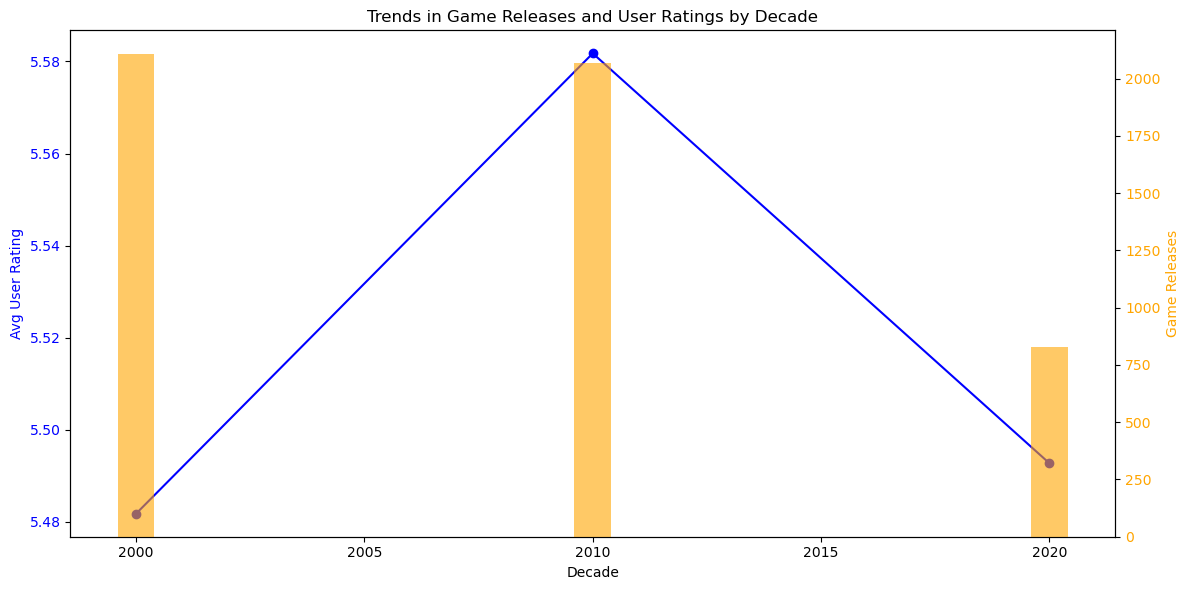

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'games_dataset.csv'
data = pd.read_csv(file_path)


data['Decade'] = (data['Release Year'] // 10) * 10


trend_data = data.groupby('Decade').agg({
    'User Rating': 'mean',     # Average user rating
    'Game Name': 'count'       # Count of game releases
}).rename(columns={'Game Name': 'Game_Count'})


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.plot(trend_data.index, trend_data['User Rating'], color='blue', marker='o', label='Avg User Rating')
ax1.set_xlabel('Decade')
ax1.set_ylabel('Avg User Rating', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.bar(trend_data.index, trend_data['Game_Count'], alpha=0.6, color='orange', label='Game Releases')
ax2.set_ylabel('Game Releases', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


plt.title('Trends in Game Releases and User Ratings by Decade')
fig.tight_layout()
plt.show()


In [22]:
#using ANOVA as we have more than 2 groups 
import pandas as pd
from scipy.stats import f_oneway #ANOVA TEST 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

file_path = 'games_dataset.csv'
data = pd.read_csv(file_path)

platforms = data['Platform'].unique()
ratings_by_platform = [data[data['Platform'] == platform]['User Rating'] for platform in platforms]

f_stat, p_value = f_oneway(*ratings_by_platform)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")


if p_value < 0.05:
    print("Reject the null hypothesis: At least one platform has a significantly different mean rating.")
else:
    print("Fail to reject the null hypothesis: No significant difference between platform ratings.")

# If ANOVA is significant, perform post-hoc Tukey's HSD test to identify the differences
if p_value < 0.05:
    # Combine all ratings into a single list with corresponding platform labels
    ratings = data['User Rating']
    platform_labels = data['Platform']
    
    tukey = pairwise_tukeyhsd(endog=ratings, groups=platform_labels, alpha=0.05)
    print(tukey)

F-Statistic: 0.47019436417637556
P-Value: 0.7576711463871735
Fail to reject the null hypothesis: No significant difference between platform ratings.


In [26]:
# top 5 genres and top 5 platforms by average user rating
import pandas as pd

# Assuming your dataset is already loaded as 'data'
# Calculate average user rating by genre
top_genres = data.groupby('Genre')['User Rating'].mean().sort_values(ascending=False).head(5)

# Calculate average user rating by platform
top_platforms = data.groupby('Platform')['User Rating'].mean().sort_values(ascending=False).head(5)

# Display the top 5 genres and platforms
print("Top 5 Genres by Average User Rating:")
print(top_genres)

print("\nTop 5 Platforms by Average User Rating:")
print(top_platforms)


Top 5 Genres by Average User Rating:
Genre
Survival      5.831934
Horror        5.629845
Simulation    5.626343
Action        5.603556
Sports        5.561171
Name: User Rating, dtype: float64

Top 5 Platforms by Average User Rating:
Platform
PC                 5.599444
Xbox               5.531032
PlayStation        5.523658
Nintendo Switch    5.523076
Mobile             5.441895
Name: User Rating, dtype: float64


● Perform a time series analysis to observe trends in game releases and user ratings over
the decades
● Conduct a hypothesis test to determine if there is a significant difference in user ratings
● Perform a correlation analysis to identify relationships between game features and user
IntelliPaat
between different platforms.
ratings.

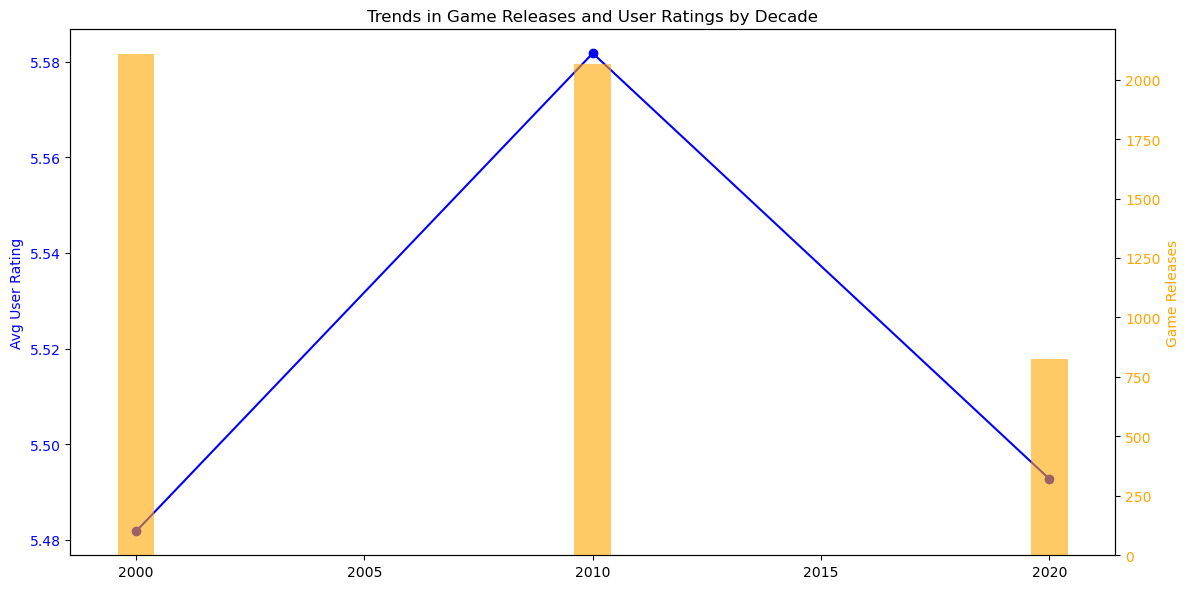

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
data['Decade'] = (data['Release Year'] // 10) * 10
trend_data = data.groupby('Decade').agg({
    'User Rating': 'mean',
    'Game Name': 'count'
})

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the average user rating
ax1.plot(trend_data.index, trend_data['User Rating'], color='blue', marker='o', label='Avg User Rating')
ax1.set_ylabel('Avg User Rating', color='blue')  # Corrected method name here
ax1.tick_params(axis='y', labelcolor='blue')

# Creating twin axes for game releases
ax2 = ax1.twinx()
ax2.bar(trend_data.index, trend_data['Game Name'], alpha=0.6, color='orange', label='Game Releases')
ax2.set_ylabel('Game Releases', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding title and displaying the plot
plt.title('Trends in Game Releases and User Ratings by Decade')
fig.tight_layout()
plt.show()


4. Machine Learning:
● Build a predictive model to estimate game ratings based on features such as genre,
platform, and release year.
● Use feature selection techniques to identify the most influential factors in predicting
game ratings.

In [40]:
from scipy.stats import f_oneway

# Example: Compare user ratings across different platforms
platforms = data['Platform'].unique()
ratings_by_platform = [data[data['Platform'] == platform]['User Rating'] for platform in platforms]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*ratings_by_platform)

# Display results
print(f"ANOVA F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in user ratings.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in user ratings.")


ANOVA F-statistic: 0.47019436417637556
P-value: 0.7576711463871735
Fail to reject the null hypothesis: There is no significant difference in user ratings.


Release Year    0.000177
User Rating     1.000000
Decade          0.006851
Name: User Rating, dtype: float64


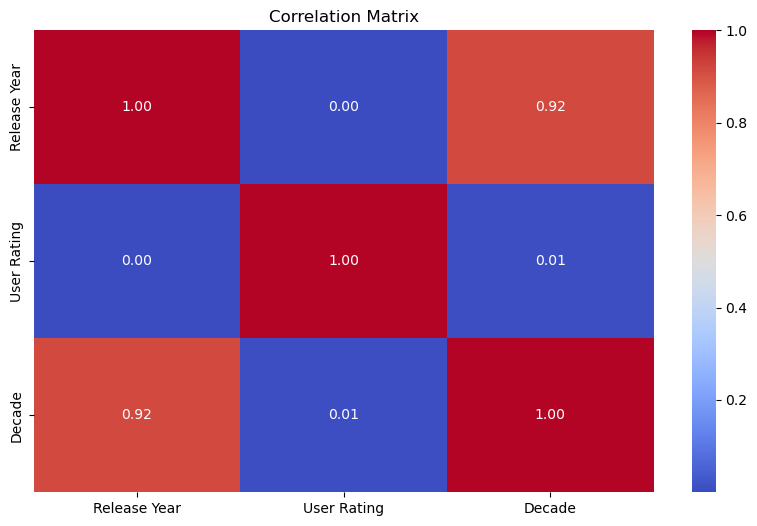

In [46]:
# Select only numeric columns from the dataset
numeric_data = data.select_dtypes(include=['number'])

# Perform correlation analysis between numeric features and user ratings
correlation = numeric_data.corr()

# Display correlation with 'User Rating'
print(correlation['User Rating'])

# If you want to visualize the correlation matrix
import seaborn as sns

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


4. Machine Learning:
● Build a predictive model to estimate game ratings based on features such as genre,
platform, and release year.
● Use feature selection techniques to identify the most influential factors in predicting
game ratings.

Mean Squared Error: 8.4907857577834
Feature ranking:
Genre: True
Platform: False
Release Year: True
Selected Features: Index(['Genre', 'Release Year'], dtype='object')


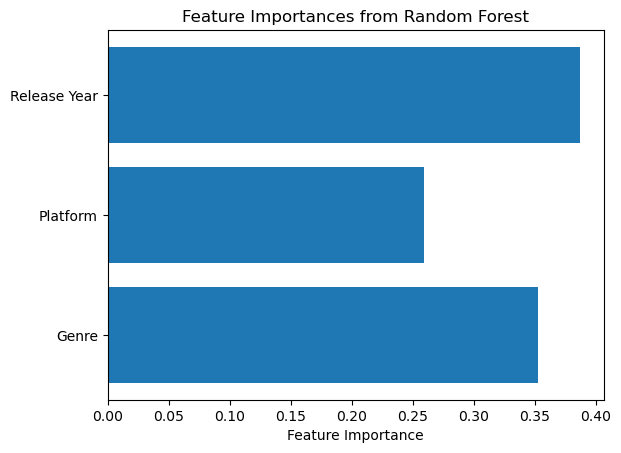

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

# Step 1: Data Preprocessing
# Assuming 'data' is your DataFrame

# Convert categorical variables to numeric using LabelEncoder
label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data['Platform'] = label_encoder.fit_transform(data['Platform'])

# Extract the features (X) and the target (y)
X = data[['Genre', 'Platform', 'Release Year']]  # Use features like Genre, Platform, Release Year
y = data['User Rating']  # Target variable: User Rating

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build a predictive model (Random Forest Regressor in this case)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 5: Feature Selection using RFE (Recursive Feature Elimination)
selector = RFE(model, n_features_to_select=2)  # Select top 2 features
selector = selector.fit(X, y)

# Display the ranking of features (1 means selected, 0 means not selected)
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f'{X.columns[i]}: {selector.support_[i]}')

# Step 6: Display the most important features identified by RFE
selected_features = X.columns[selector.support_]
print(f'Selected Features: {selected_features}')

# Step 7: Plot the feature importances (Random Forest)
import matplotlib.pyplot as plt
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()
